# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nyurba
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | kieta
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bintulu
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | aksu
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | zvishavane
Processing Record 15 of Set 1 | luanda
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 

Processing Record 36 of Set 4 | takoradi
Processing Record 37 of Set 4 | lagos
Processing Record 38 of Set 4 | shingu
Processing Record 39 of Set 4 | dudinka
Processing Record 40 of Set 4 | mokhsogollokh
Processing Record 41 of Set 4 | pocatello
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | deputatskiy
Processing Record 44 of Set 4 | barawe
City not found. Skipping...
Processing Record 45 of Set 4 | gunnedah
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | falealupo
City not found. Skipping...
Processing Record 49 of Set 4 | torbat-e jam
Processing Record 0 of Set 5 | norman wells
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | iralaya
Processing Record 3 of Set 5 | itarema
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | yei
Processing Record 6 of Set 5 | shelopugino
Processing Record 7 of Set 5 | khani
Processing Record 8 of Set 5 | berlevag
Proce

Processing Record 26 of Set 8 | alofi
Processing Record 27 of Set 8 | namatanai
Processing Record 28 of Set 8 | rio claro
Processing Record 29 of Set 8 | bambous virieux
Processing Record 30 of Set 8 | filingue
Processing Record 31 of Set 8 | yamada
Processing Record 32 of Set 8 | waipawa
Processing Record 33 of Set 8 | anadyr
Processing Record 34 of Set 8 | honiara
Processing Record 35 of Set 8 | nagapattinam
Processing Record 36 of Set 8 | riesa
Processing Record 37 of Set 8 | atar
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | kyren
Processing Record 40 of Set 8 | mirnyy
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | tabukiniberu
City not found. Skipping...
Processing Record 43 of Set 8 | kajaani
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | bloomfield
Processing Record 46 of Set 8 | sunrise manor
Processing Record 47 of Set 8 | jardim
Processing Record 48 of Set 8 | yarada
Processing Record 49 of Set 8 | 

Processing Record 21 of Set 12 | denpasar
Processing Record 22 of Set 12 | muriwai beach
Processing Record 23 of Set 12 | malinao
Processing Record 24 of Set 12 | jatiroto
Processing Record 25 of Set 12 | antsohihy
Processing Record 26 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 27 of Set 12 | killarney
Processing Record 28 of Set 12 | alotau
City not found. Skipping...
Processing Record 29 of Set 12 | ravar
Processing Record 30 of Set 12 | kachug
Processing Record 31 of Set 12 | soyo
Processing Record 32 of Set 12 | kuvshinovo
Processing Record 33 of Set 12 | aykhal
Processing Record 34 of Set 12 | grand-santi
Processing Record 35 of Set 12 | tyrma
Processing Record 36 of Set 12 | sorvag
City not found. Skipping...
Processing Record 37 of Set 12 | ibra
Processing Record 38 of Set 12 | siimusti
Processing Record 39 of Set 12 | sao joao do piaui
Processing Record 40 of Set 12 | rovaniemi
Processing Record 41 of Set 12 | natal
Processing Record 42 of Set 12 | kru

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nyurba,63.2842,118.3319,-42.41,100,93,0.61,RU,1675720148
1,kodiak,57.7900,-152.4072,2.73,60,0,2.06,US,1675720148
2,kapaa,22.0752,-159.3190,26.18,82,40,7.20,US,1675719960
3,kieta,-6.2167,155.6333,26.10,87,100,2.70,PG,1675719946
4,vaini,-21.2000,-175.2000,28.09,78,75,2.57,TO,1675720149


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nyurba,63.2842,118.3319,-42.41,100,93,0.61,RU,1675720148
1,kodiak,57.7900,-152.4072,2.73,60,0,2.06,US,1675720148
2,kapaa,22.0752,-159.3190,26.18,82,40,7.20,US,1675719960
3,kieta,-6.2167,155.6333,26.10,87,100,2.70,PG,1675719946
4,vaini,-21.2000,-175.2000,28.09,78,75,2.57,TO,1675720149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

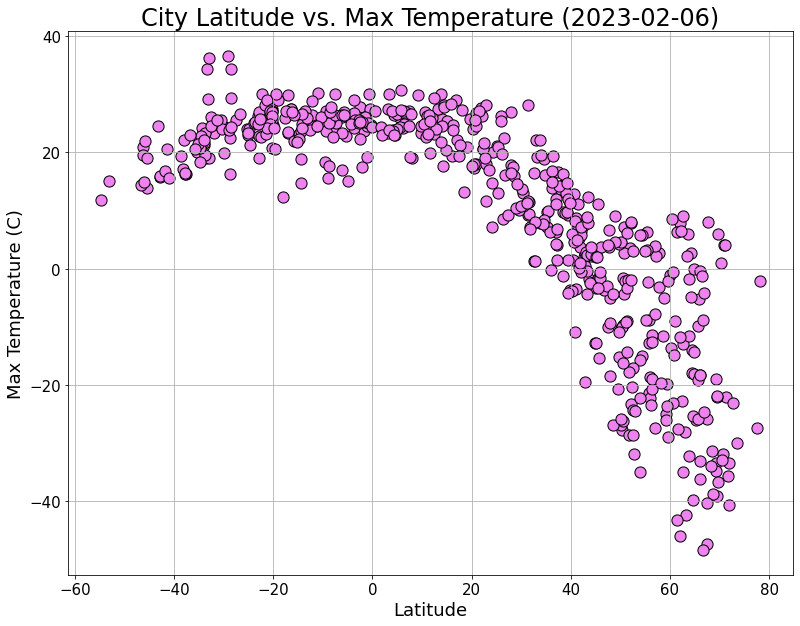

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

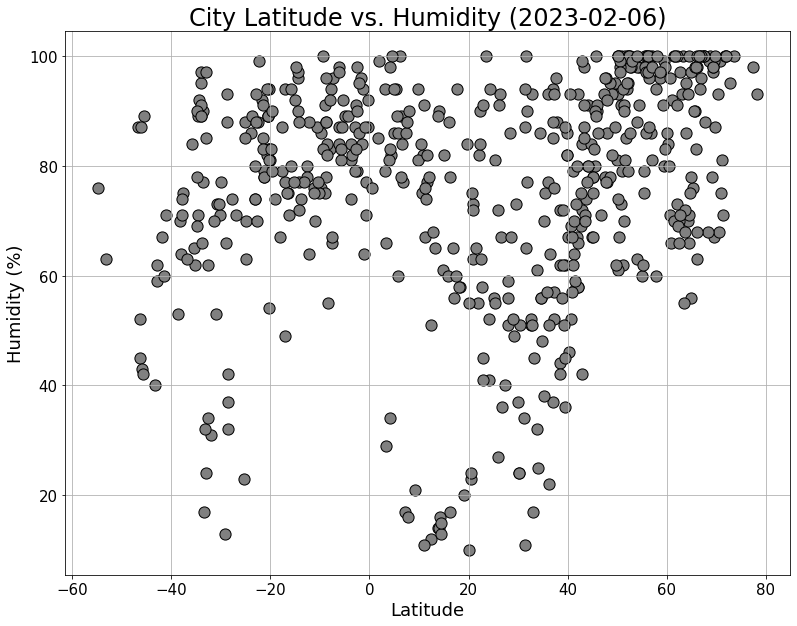

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'gray', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

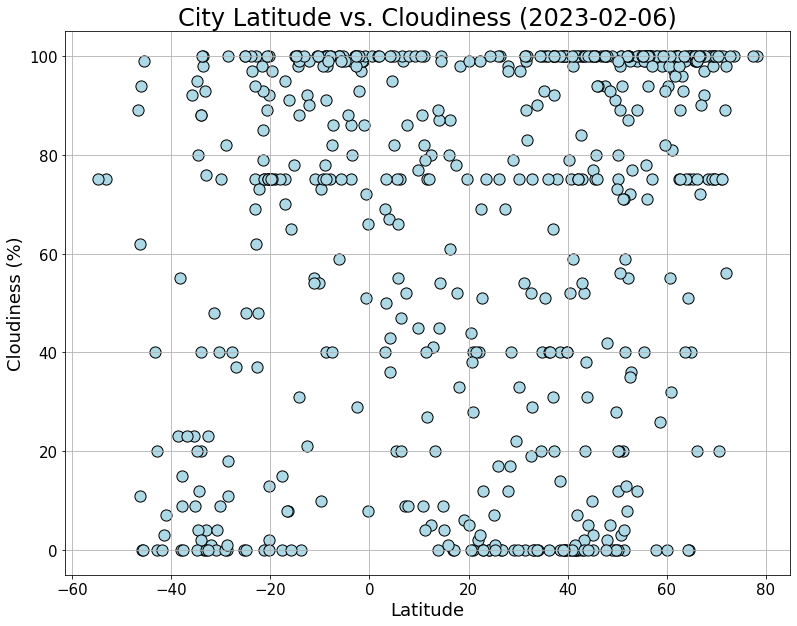

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'lightblue', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

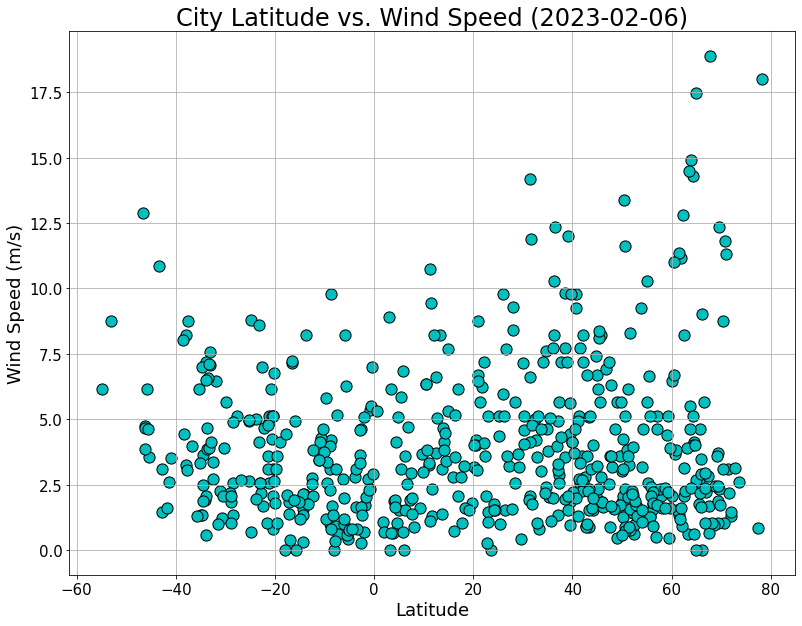

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (13,10))
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'c', edgecolors = 'black', s = 125)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-06)", fontsize = 24)
plt.xlabel("Latitude", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Wind Speed (m/s)", fontsize = 18)
plt.yticks(fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression():
    tem_slope, tem_int, tem_r, tem_p, tem_std_err = linregress(x_axis, y_axis)
    tem_fit = tem_slope * x_axis + tem_int
    line_eq = "y= " + str(round(tem_slope,2)) + "x + " + str(round(tem_int,2))

    return plt.plot(x_axis, tem_fit, color = 'r'),\
           plt.annotate(line_eq, (x,y), fontsize = 25, color = "red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df.loc[city_data_df["Lat"] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nyurba,63.2842,118.3319,-42.41,100,93,0.61,RU,1675720148
1,kodiak,57.7900,-152.4072,2.73,60,0,2.06,US,1675720148
2,kapaa,22.0752,-159.3190,26.18,82,40,7.20,US,1675719960
6,bintulu,3.1667,113.0333,23.23,94,40,0.00,MY,1675720153
8,aksu,41.1231,80.2644,-3.49,79,98,1.29,CN,1675720158


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df.loc[city_data_df["Lat"] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kieta,-6.2167,155.6333,26.10,87,100,2.70,PG,1675719946
4,vaini,-21.2000,-175.2000,28.09,78,75,2.57,TO,1675720149
5,rikitea,-23.1203,-134.9692,26.14,74,69,4.13,PF,1675720062
7,arraial do cabo,-22.9661,-42.0278,26.92,74,75,2.57,BR,1675720154
9,mahebourg,-20.4081,57.7000,26.16,89,75,5.14,MU,1675720159


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.837022768019895


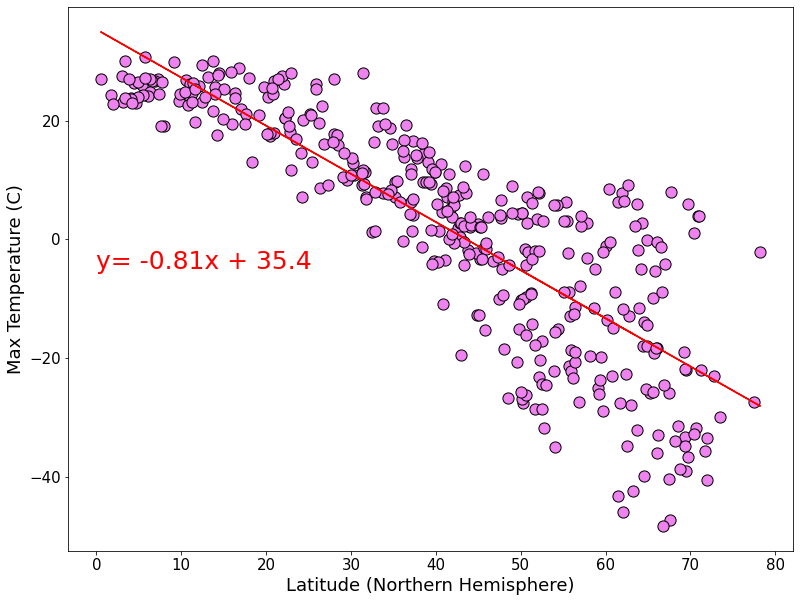

In [15]:
# Linear regression on Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=0
y=-5
linear_regression()
 
plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: 0.38888274063598094


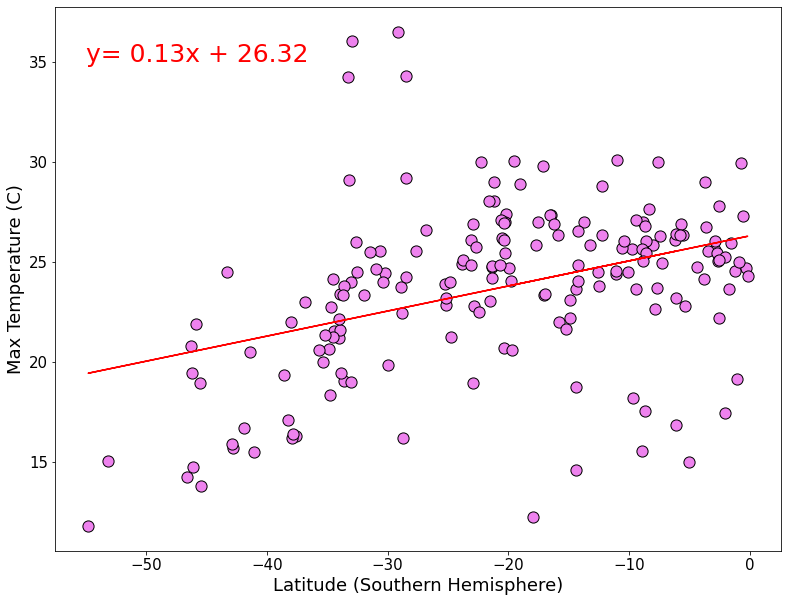

In [16]:
# Linear regression on Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-55
y=35
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** When analyzing the correlation between Maximum Temperature and Latitude in Northern Hemisphere we can observe a strong negative correlation between variables. The Temperature is in a high dependency of Latitude, the closer we are to the Equator the higher is the Temperature.
The graph for the Southern Hemisphere is not so categorical, the Temperature range is much lower and the dispersion is wider with no such evident correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.410615844486687


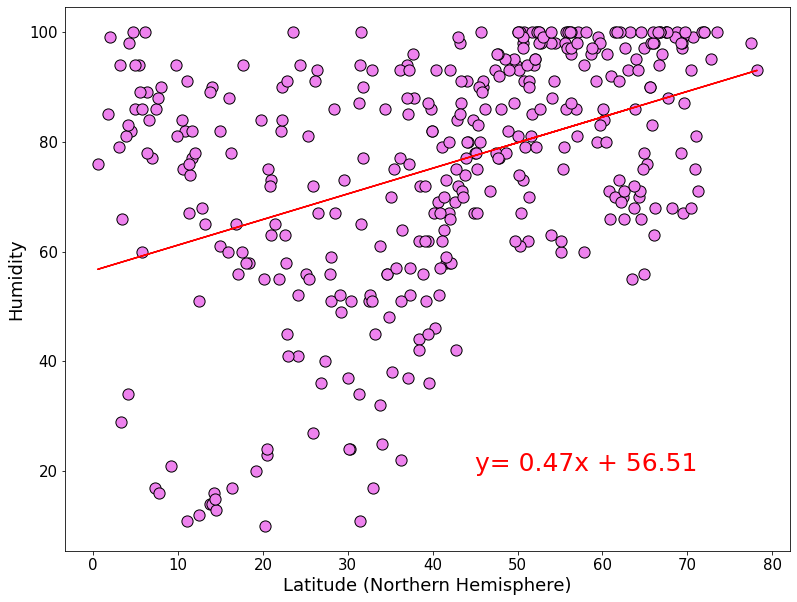

In [17]:
# Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=45
y=20
linear_regression()

plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Humidity", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: 0.41503946340661013


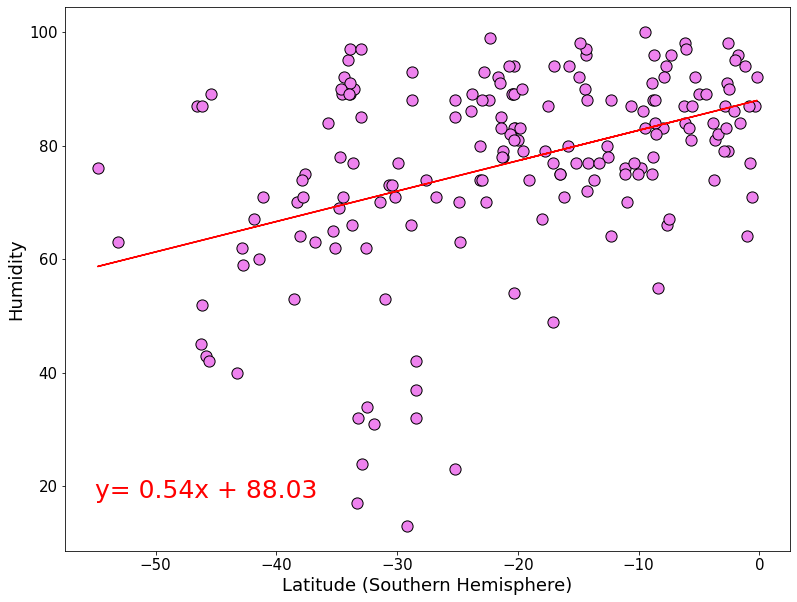

In [18]:
# Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-55
y=18
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Humidity", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere graph shows a moderate positive correlation between Latitude and Humidity however when looking closer at the higher Latitude marks the dots become constrained. At the Latitude greater than 40 we can see a stronger positive correlation showing that the Humidity increases as we move away from the Equator.
Southern Hemisphere graph doesn't show a strong correlation however the r-value is also positive.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2670537804665972


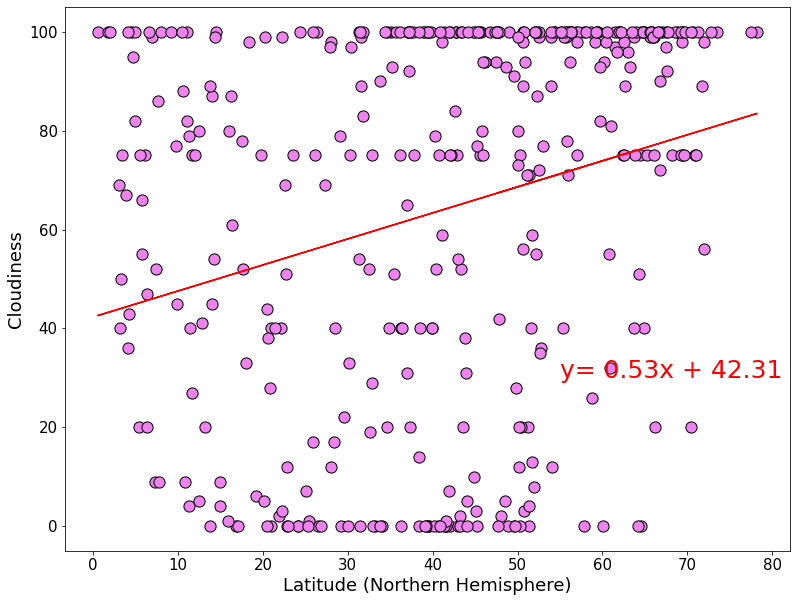

In [19]:
# Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=55
y=30
linear_regression()

plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Cloudiness", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: 0.4641519556957376


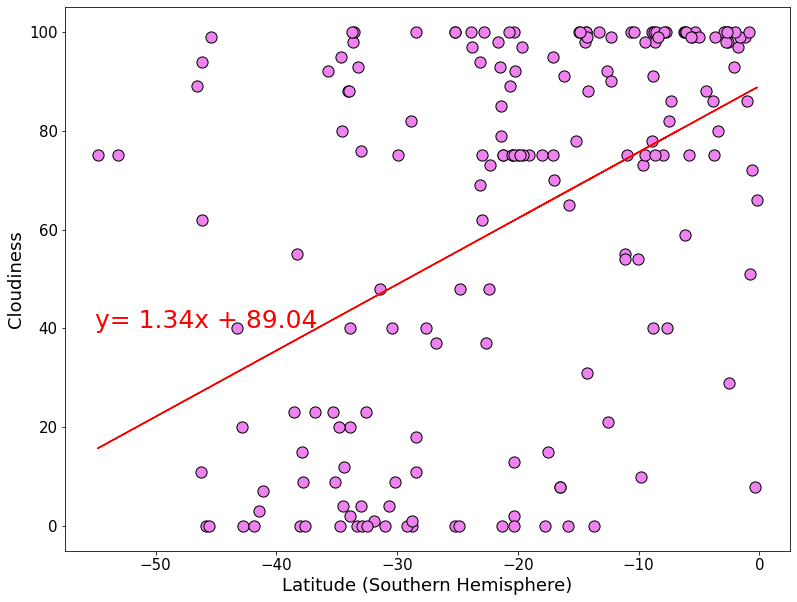

In [20]:
# Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-55
y=40
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Cloudiness", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere graph shows that the Cloudiness index tends to avoid medium ranges, it's mostly low or high independent of Latitude.
Southern Hemisphere graph shows a little bit stronger positive correlation between Latitude and Cloudiness than above Equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04427965316347168


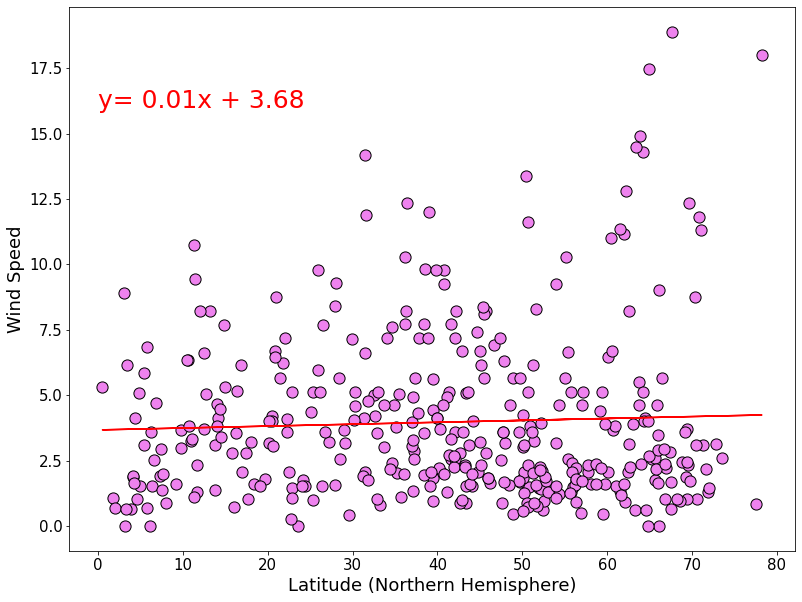

In [21]:
# Northern Hemisphere
plt.figure(figsize = (13,10))
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=0
y=16
linear_regression()

plt.xlabel("Latitude (Northern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Wind Speed", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

The r-value is: -0.3154866404708786


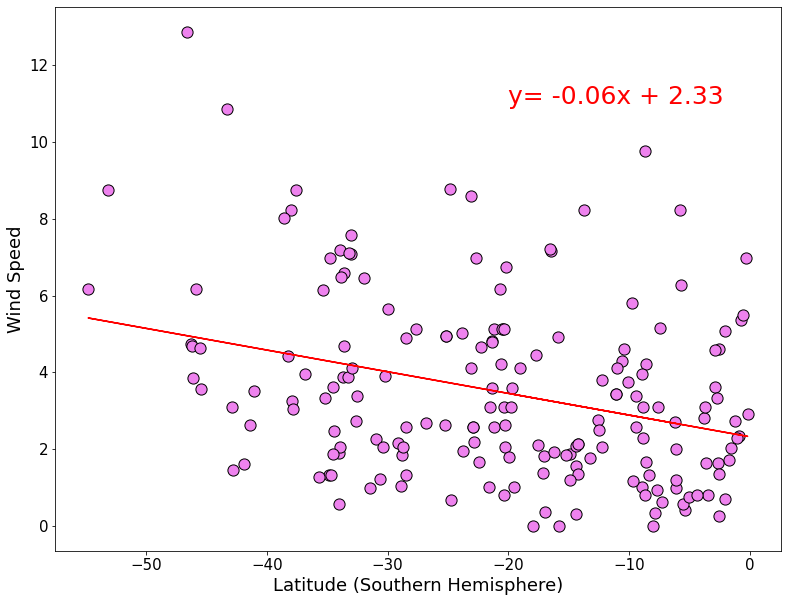

In [22]:
# Southern Hemisphere
plt.figure(figsize = (13,10))
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker = 'o',\
             facecolors = 'violet', edgecolors = 'black', s = 125)
x=-20
y=11
linear_regression()

plt.xlabel("Latitude (Southern Hemisphere)", fontsize = 18)
plt.xticks(fontsize = 15)
plt.ylabel("Wind Speed", fontsize = 18)
plt.yticks(fontsize = 15)

print(f"The r-value is: {pearsonr(x_axis, y_axis)[0]}")
plt.show()

**Discussion about the linear relationship:** The Wind Speed value is pretty much spread uniform along the Latitude range in the Northern Hemisphere.
Southern Hemisphere graph shows a weak negative correlation between Latitude and Wind Speed pointing toward the fact that Wind blows harder as we move away from Equator.